In [1]:
%matplotlib inline

import pandas as pd

In [2]:
meta = pd.DataFrame.from_csv('../raw/samples.all.txt', sep='\t')

In [3]:
meta.columns

Index(['ox_code', 'src_code', 'sra_sample_accession', 'population', 'country',
       'region', 'contributor', 'contact', 'year', 'm_s', 'sex', 'n_sequences',
       'mean_coverage', 'latitude', 'longitude', 'kt_2la', 'kt_2rb',
       'kdr_1014', 'rdl_296', 'f_roh_100kb', 'count_roh_100kb',
       'sum_roh_100kb', 'pca_3R_free_pc1', 'pca_3R_free_pc2',
       'pca_3R_free_pc3', 'pca_3R_free_pc4', 'pca_3L_free_pc1',
       'pca_3L_free_pc2', 'pca_3L_free_pc3', 'pca_3L_free_pc4', 'pca_2La_pc1',
       'pca_2La_pc2', 'pca_2La_pc3', 'pca_2La_pc4', 'pca_2Rb_pc1',
       'pca_2Rb_pc2', 'pca_2Rb_pc3', 'pca_2Rb_pc4'],
      dtype='object')

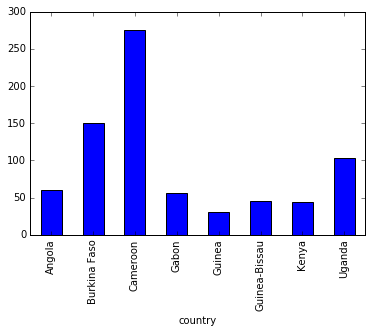

In [4]:
meta.groupby('country').size().plot.bar()

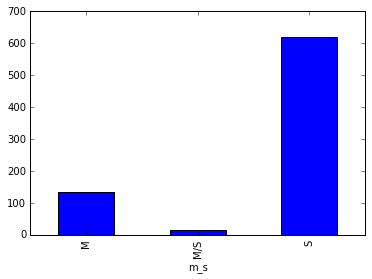

In [5]:
meta.groupby(['m_s']).size().plot.bar()

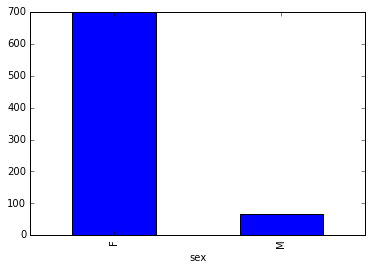

In [11]:
meta.groupby(['sex']).size().plot.bar()

In [13]:
meta['mean_coverage'].describe()

count    765.000000
mean      31.734601
std        9.258979
min       14.210000
25%       27.350000
50%       30.540000
75%       34.340000
max       98.480000
Name: mean_coverage, dtype: float64